<a href="https://colab.research.google.com/github/salvatore-juarezh/inteligencia-artificial/blob/main/rnn/bitcoinrrn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#Opción 1 (Descarga Manual)
import pandas as pd

_df = pd.read_csv("/content/Bitcoin_20_9_2025-21_11_2025_historical_data_coinmarketcap.csv", delimiter=';')
# Ordenamos correctamente
_df = _df.sort_index(ascending=False)
_df.head()

,timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,marketCap,circulatingSupply,timestamp
397,2024-10-19T00:00:00.000Z,2024-10-19T23:59:59.999Z,2024-10-19T03:18:00.000Z,2024-10-19T17:03:00.000Z,2781,68418.976662,68668.005810,68024.638235,68362.733110,1.444350e+10,1.351535e+12,19770059,2024-10-19T23:59:59.999Z
396,2024-10-20T00:00:00.000Z,2024-10-20T23:59:59.999Z,2024-10-20T22:53:00.000Z,2024-10-20T03:09:00.000Z,2781,68364.178460,69359.007061,68105.720506,69001.706621,1.897585e+10,1.364213e+12,19770625,2024-10-20T23:59:59.999Z
395,2024-10-21T00:00:00.000Z,2024-10-21T23:59:59.999Z,2024-10-21T00:32:00.000Z,2024-10-21T15:13:00.000Z,2781,69002.000147,69462.736782,66829.853468,67367.852556,3.749861e+10,1.331798e+12,19771143,2024-10-21T23:59:59.999Z
394,2024-10-22T00:00:00.000Z,2024-10-22T23:59:59.999Z,2024-10-22T22:57:00.000Z,2024-10-22T00:34:00.000Z,2781,67360.702726,67801.576998,66581.367979,67361.402665,3.180847e+10,1.331842e+12,19771596,2024-10-22T23:59:59.999Z
393,2024-10-23T00:00:00.000Z,2024-10-23T23:59:59.999Z,2024-10-23T00:01:00.000Z,2024-10-23T18:21:00.000Z,2781,67362.374421,67402.744624,65188.035292,66432.198247,3.226398e+10,1.313495e+12,19772059,2024-10-23T23:59:59.999Z


In [6]:
#Opción 2 (Leer en web desde pandas)
import pandas as pd

_df = pd.read_csv("/content/Bitcoin_20_9_2025-21_11_2025_historical_data_coinmarketcap.csv", delimiter=';')
# Ordenamos correctamente
_df = _df.sort_index(ascending=False)
_df.head()

,timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,marketCap,circulatingSupply,timestamp
397,2024-10-19T00:00:00.000Z,2024-10-19T23:59:59.999Z,2024-10-19T03:18:00.000Z,2024-10-19T17:03:00.000Z,2781,68418.976662,68668.005810,68024.638235,68362.733110,1.444350e+10,1.351535e+12,19770059,2024-10-19T23:59:59.999Z
396,2024-10-20T00:00:00.000Z,2024-10-20T23:59:59.999Z,2024-10-20T22:53:00.000Z,2024-10-20T03:09:00.000Z,2781,68364.178460,69359.007061,68105.720506,69001.706621,1.897585e+10,1.364213e+12,19770625,2024-10-20T23:59:59.999Z
395,2024-10-21T00:00:00.000Z,2024-10-21T23:59:59.999Z,2024-10-21T00:32:00.000Z,2024-10-21T15:13:00.000Z,2781,69002.000147,69462.736782,66829.853468,67367.852556,3.749861e+10,1.331798e+12,19771143,2024-10-21T23:59:59.999Z
394,2024-10-22T00:00:00.000Z,2024-10-22T23:59:59.999Z,2024-10-22T22:57:00.000Z,2024-10-22T00:34:00.000Z,2781,67360.702726,67801.576998,66581.367979,67361.402665,3.180847e+10,1.331842e+12,19771596,2024-10-22T23:59:59.999Z
393,2024-10-23T00:00:00.000Z,2024-10-23T23:59:59.999Z,2024-10-23T00:01:00.000Z,2024-10-23T18:21:00.000Z,2781,67362.374421,67402.744624,65188.035292,66432.198247,3.226398e+10,1.313495e+12,19772059,2024-10-23T23:59:59.999Z


In [7]:
#importamos el contenido de drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
#dataframe con estas columnas
'timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'name', 'open', 'high',
'low', 'close', 'volume', 'marketCap', 'timestamp'

('low', 'close', 'volume', 'marketCap', 'timestamp')

In [9]:
#seleccion de dataframe
df = _df[['timeOpen', 'open', 'high', 'low', 'close']]

In [10]:
#conversion de datos a numpy array
dates = df[['close']].values

In [11]:
#escalonamos los valores
from sklearn.preprocessing import MinMaxScaler

#usamos minmaxscaler con rangos de 0 y 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dates)

In [12]:
#definir tamaño de tiempo
window_size = 60

In [13]:
#secuencia de datos
import numpy as np

def create_sequences(data, window_size):
    #crear listas vacías para guardar las secuencias y sus respuestas
    sequences = []
    labels = []

    #recorre los datos desde el inicio hasta donde quepa una ventana completa
    for i in range(len(data) - window_size):
        #tomar un bloque de datos
        sequences.append(data[i:i+window_size])


        labels.append(data[i + window_size, 0])

    #convierte las listas en arrays para que la red neuronal los entienda
    return np.array(sequences), np.array(labels)

#datos de entrenamiento
X, y = create_sequences(scaled_data, window_size)

In [14]:
#division de datos de entrenamiento y prueba
split = int(len(X) * 0.8)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

In [15]:
#modelo rnn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN

#modelo secuencial (capas)
model = Sequential()

#capa rnn con 120 neuronas, devuelve toda la secuencia para la siguiente capa
model.add(SimpleRNN(units=120, return_sequences=True, input_shape=(window_size, X_train.shape[2])))

#segunda capa rnn con 60 neuronas, ya no devuelve secuencia completa
model.add(SimpleRNN(units=60, return_sequences=False))

# capa densa normal con 30
model.add(Dense(units=30))

# capa final con 1 neurona
model.add(Dense(units=1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
#entrenamiento y copilacion
from tensorflow.keras.optimizers import Adam

learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)

# Compilar el modelo
model.compile(optimizer=adam_optimizer, loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.0522
Epoch 2/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0122
Epoch 3/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0055
Epoch 4/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0061
Epoch 5/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0044
Epoch 6/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0031
Epoch 7/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.0020
Epoch 8/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0024
Epoch 9/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0027
Epoch 10/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0029


In [17]:
#testing
# Hacer predicciones
predictions = model.predict(X_test)

# Desescalar los datos predichos
predictions = scaler.inverse_transform(np.concatenate((predictions, np.zeros((predictions.shape[0], 3))), axis=1))[:,0]
y_test = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 3))), axis=1))[:,0]

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step


In [23]:
#calculo de matrices
from sklearn.metrics import mean_absolute_error, mean_squared_error

#calcula error
mae = mean_absolute_error(y_test, predictions)

#calcula raiz de error
rmse = np.sqrt(mean_squared_error(y_test, predictions))

#mostrar los resultados
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

MAE: 2213.686443486905
RMSE: 2729.6741444439144


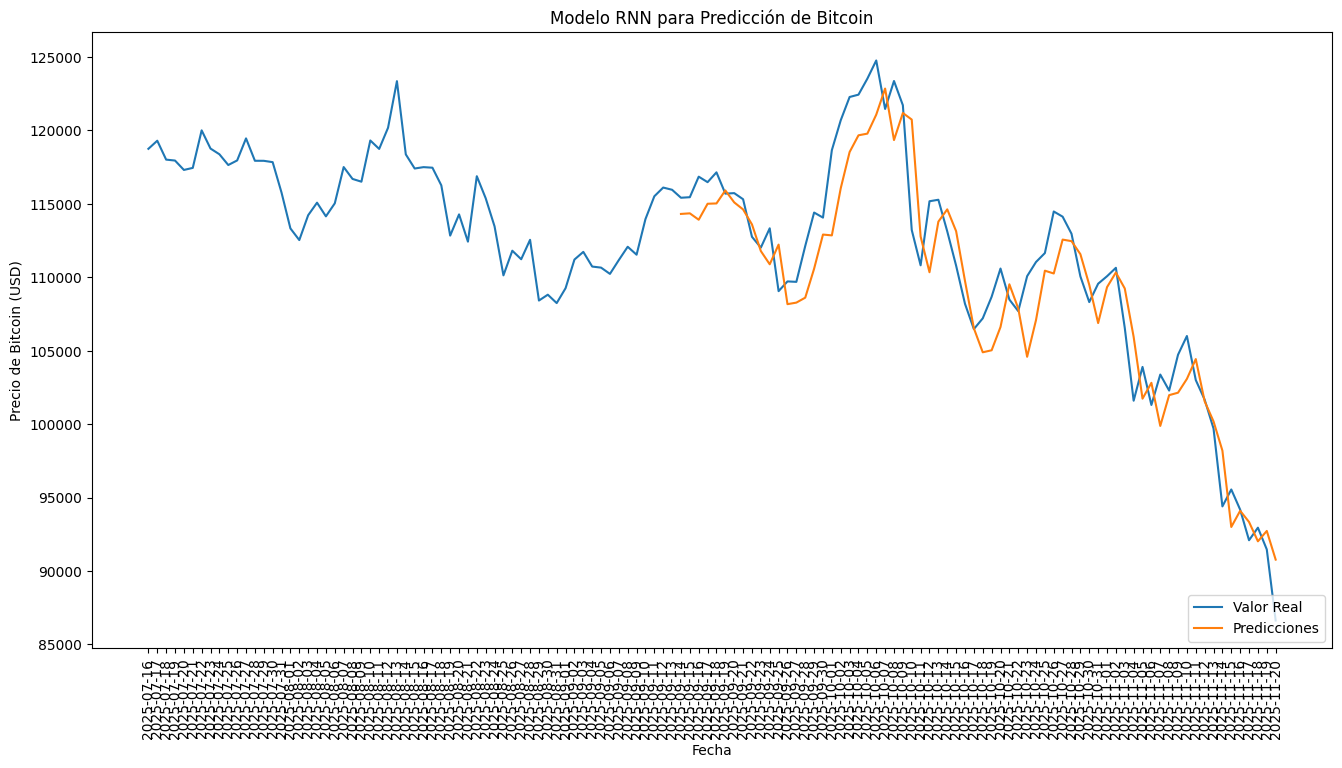

In [19]:
#grafica de resultados
import matplotlib.pyplot as plt
import numpy as np

valid = df[split:]
# Reiniciar el índice del DataFrame de validación
valid = valid.reset_index(drop=True)
# Inicializar la columna de predicciones con NaN
valid['Predictions'] = np.nan

# Añadir las predicciones al DataFrame de validación desde el punto donde inician las predicciones
valid.loc[window_size:, 'Predictions'] = predictions
dates_valid = pd.to_datetime(valid['timeOpen']).apply(lambda x: x.strftime('%Y-%m-%d')).tolist()

plt.figure(figsize=(16,8))
plt.title('Modelo RNN para Predicción de Bitcoin')
plt.xlabel('Fecha')
plt.ylabel('Precio de Bitcoin (USD)')
plt.plot(dates_valid, valid[['close', 'Predictions']])
plt.legend(['Valor Real', 'Predicciones'], loc='lower right')
plt.xticks(rotation=90)
plt.show()
#La línea azul es el precio real del Bitcoin y la línea naranja son las predicciones del modelo. El modelo sigue la tendencia general pero no acierta exactamente todos los movimientos del precio.



In [20]:
#prediccion de valores nuevos
# Generar secuencias para los siguientes días
future_sequences = []
# Última secuencia de los valores que tenemos
last_sequence = X[-1]

days = 10
for _ in range(days):
    # Predecir el siguiente valor
    next_value = model.predict(np.array([last_sequence]))[0, 0]

    # Actualizar la secuencia para la siguiente predicción
    last_sequence = np.concatenate((last_sequence[1:], [[next_value]]), axis=0)

    # Añadir la nueva secuencia a las secuencias futuras
    future_sequences.append(last_sequence)

# Convertir las secuencias futuras a un numpy y reshape para la RNN
future_sequences = np.array(future_sequences)
future_sequences = np.reshape(future_sequences, (future_sequences.shape[0], future_sequences.shape[1], 1))

# Hacer predicciones para los siguientes días
future_predictions = model.predict(future_sequences)

# Desescalar los datos predichos para los siguientes días
future_predictions = scaler.inverse_transform(np.concatenate((future_predictions, np.zeros((future_predictions.shape[0], 3))), axis=1))[:,0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [21]:
#generar fecha para siguientes dias
# Última fecha en los datos reales
last_date = df['timeOpen'].iloc[-1]
future_dates = pd.date_range(start=last_date, periods=days)[1:]
future_dates = future_dates.strftime('%Y-%m-%d').tolist()

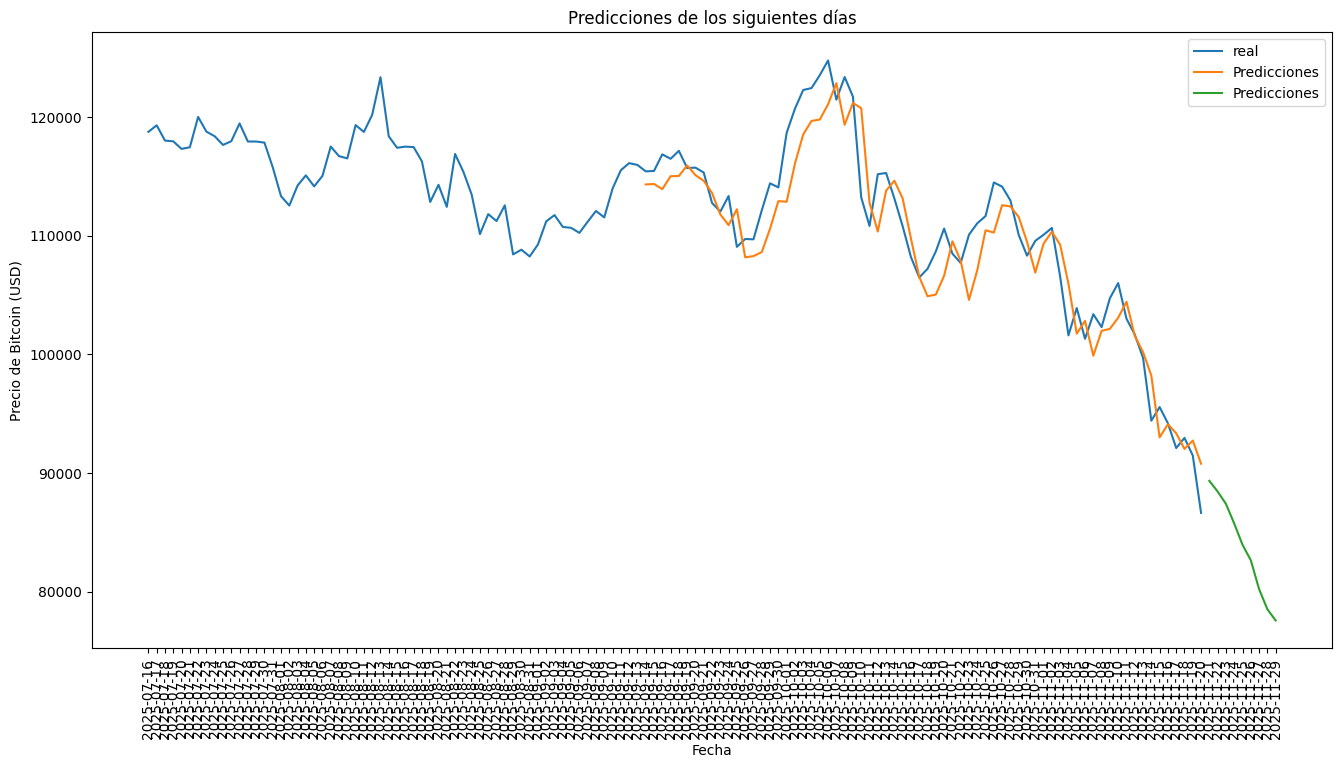

In [22]:
#grafica de los siguientes 30 dias
plt.figure(figsize=(16,8))
plt.title('Predicciones de los siguientes días')
plt.xlabel('Fecha')
plt.ylabel('Precio de Bitcoin (USD)')
plt.plot(dates_valid, valid[['close', 'Predictions']], label=['real', 'Predicciones'])
plt.plot(future_dates, future_predictions[:-1], label='Predicciones')
plt.legend()
plt.xticks(rotation=90)
plt.show()